<a href="https://colab.research.google.com/github/RajaGiddi/Heart-Disease-Classification/blob/main/Heart_Disease_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Heart Disease Classification

Dataset: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Preprocessing + Feature Engineering + EDA

num: 0=no heart disease; 1,2,3,4 = stages of heart disease

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Machine Learning/BME in ML/Naive Bayes/heart_disease_uci.csv', sep=",")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df = df.drop(['id', 'dataset'], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# @title Looking for missing value

print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
cols = df.columns.tolist()
cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [ ]:
for i in range(len(cols)):
  num_rows = len(df[cols[i]])
  print(f"{cols[i]} number of rows: ", num_rows)

  # use count method to count number of non-null values
  num_non_null = df[cols[i]].count()
  null_values = num_rows - num_non_null
  percent_null = 100 * (null_values / num_rows)

  print(f"{cols[i]} number of non-null rows: ", num_non_null)
  print(f"{cols[i]} number of null rows: ", null_values)
  print(f"{cols[i]} percentage of null rows: ", percent_null)

  print("\n")

age number of rows:  299
age number of non-null rows:  299
age number of null rows:  0
age percentage of null rows:  0.0


sex number of rows:  299
sex number of non-null rows:  299
sex number of null rows:  0
sex percentage of null rows:  0.0


cp number of rows:  299
cp number of non-null rows:  299
cp number of null rows:  0
cp percentage of null rows:  0.0


trestbps number of rows:  299
trestbps number of non-null rows:  299
trestbps number of null rows:  0
trestbps percentage of null rows:  0.0


chol number of rows:  299
chol number of non-null rows:  299
chol number of null rows:  0
chol percentage of null rows:  0.0


fbs number of rows:  299
fbs number of non-null rows:  299
fbs number of null rows:  0
fbs percentage of null rows:  0.0


restecg number of rows:  299
restecg number of non-null rows:  299
restecg number of null rows:  0
restecg percentage of null rows:  0.0


thalch number of rows:  299
thalch number of non-null rows:  299
thalch number of null rows:  0
thalch 

In [ ]:
df.dropna(inplace = True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Demographics and Basic Data Exploration

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


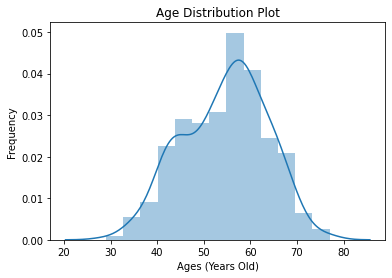

In [ ]:
# @title Age Distribution

sns.distplot(df['age'])

plt.title('Age Distribution Plot')
plt.xlabel('Ages (Years Old)')
plt.ylabel('Frequency')
plt.show()

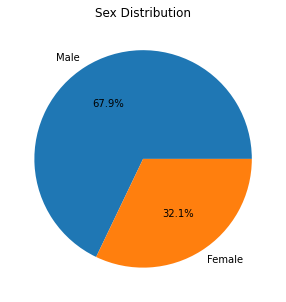

In [ ]:
# @title Sex Distribution

values_of_sex = df["sex"].value_counts()

plt.figure(figsize=(10, 5))
colors = sns.color_palette('pastel')

# create the pie chart
plt.pie(values_of_sex, labels=values_of_sex.index, autopct='%1.1f%%')

# set the plot title
plt.title('Sex Distribution')

# show the plot
plt.show()

Text(0.5, 1.0, 'Age vs. Cholesterol')

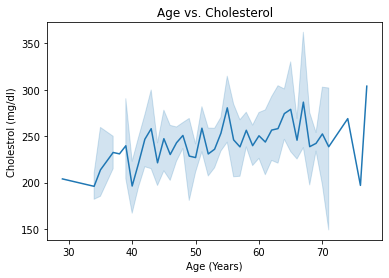

In [ ]:
# @title Lineplot between Cholestrol and Age

sns.lineplot(x='age', y='chol', data=df)

plt.xlabel('Age (Years)')
plt.ylabel('Cholestrol (mg/dl)')
plt.title('Age vs. Cholesterol')


There clearly isn't a strong relationship between age and cholesterol

Text(0.5, 1.0, 'Major Vessels vs. Stages of HD')

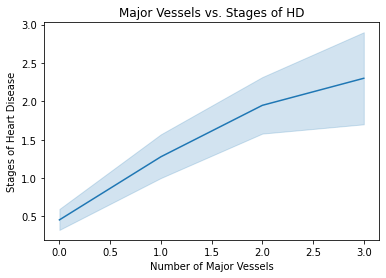

In [ ]:
# @title Lineplot between Number of Major Vessels and Num

sns.lineplot(x='ca', y='num', data=df)

plt.xlabel('Number of Major Vessels')
plt.ylabel('Stages of Heart Disease')
plt.title('Major Vessels vs. Stages of HD')


Clear positive trend between number of major vessels found via fluroscopy and stages of heart diseases, however the uncertainity is faily high and gets higher as the number of vessels become greater than 2.

Text(0.5, 1.0, 'Resting ECG vs. Stages of HD')

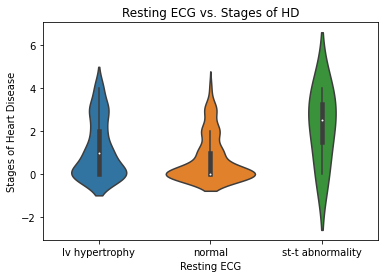

In [ ]:
# @title Violin between Resting ECG and Heart Disease Stage

sns.violinplot(x='restecg', y='num', data=df)

plt.xlabel('Resting ECG')
plt.ylabel('Stages of Heart Disease')
plt.title('Resting ECG vs. Stages of HD')

Text(0.5, 1.0, 'Resting ECG vs. Stages of HD')

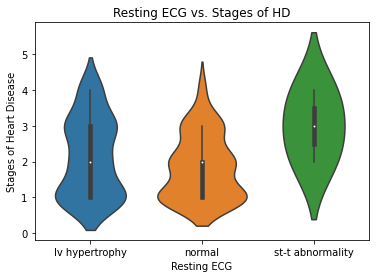

In [ ]:
heart_disease = df.query('num != 0')
no_heart_disease = df.query('num == 0')

sns.violinplot(x='restecg', y='num', data=heart_disease)

plt.xlabel('Resting ECG')
plt.ylabel('Stages of Heart Disease')
plt.title('Resting ECG vs. Stages of HD')

Individuals with IV Hypertropy have shown to have mostly no heart disease. The second highest probability of this group is to be at stage 3 of having heart disease.

St-t-Abnormal individuals clearly show to have a greater indiciation of heart disease, especially around stage 3.

Text(0.5, 1.0, 'Chest Pain vs. Stages of HD')

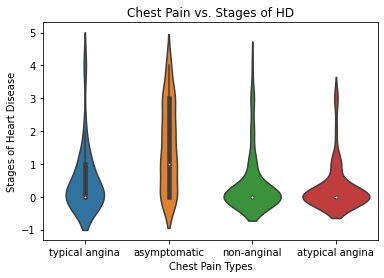

In [ ]:
# @title Violin between Chest Pain and Heart Disease Stage

sns.violinplot(x='cp', y='num', data=df)

plt.xlabel('Chest Pain Types')
plt.ylabel('Stages of Heart Disease')
plt.title('Chest Pain vs. Stages of HD')

Text(0.5, 1.0, 'Chest Pain vs. Stages of HD')

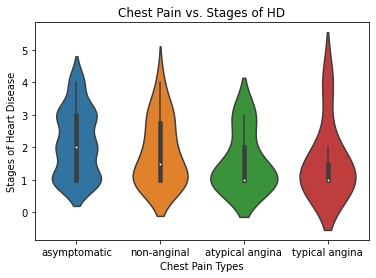

In [ ]:
heart_disease = df.query('num != 0')
no_heart_disease = df.query('num == 0')

sns.violinplot(x='cp', y='num', data=heart_disease)

plt.xlabel('Chest Pain Types')
plt.ylabel('Stages of Heart Disease')
plt.title('Chest Pain vs. Stages of HD')

Asymptomatic individuals show a greater uncertanity of at what stage of heart disease they have, they rest show strong indication of not having heart disease with a very small population having heart disease

Looking a bit closer at just the individuals with heart disease, it seems the asymptomatic individuals still show uncertanity throughout the stage of heart disease. The rest show stronger indication for stage 1 of heart disease.

Text(0.5, 1.0, 'EIA vs. Stages of HD')

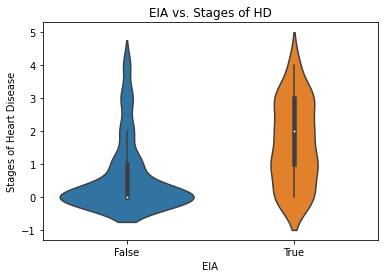

In [ ]:
# @title Violin between Exercise-Induced Angina (EIA) and Heart Disease Stage

sns.violinplot(x='exang', y='num', data=df)

plt.xlabel('EIA')
plt.ylabel('Stages of Heart Disease')
plt.title('EIA vs. Stages of HD')

We clearly see that individuals who didn't have EIA are more likely to be normal whereas individuals with EIA show greater chance of having heart disease. The degree of heart disease is hard to tell due to the uniformity of the violin plots.

Text(0.5, 1.0, 'Fasting Blood Sugar vs. Stages of HD')

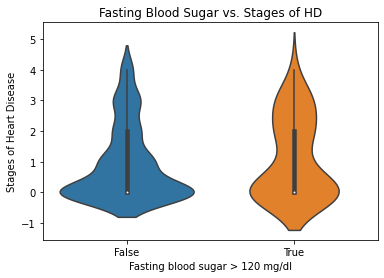

In [ ]:
# @title Violin between Fasting Blood Sugar and Heart Disease Stage

heart_disease = df.query('num != 0')
no_heart_disease = df.query('num == 0')

sns.violinplot(x='fbs', y='num', data=df)

plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.ylabel('Stages of Heart Disease')
plt.title('Fasting Blood Sugar vs. Stages of HD')

Text(0.5, 1.0, 'Fasting Blood Sugar vs. Stages of HD')

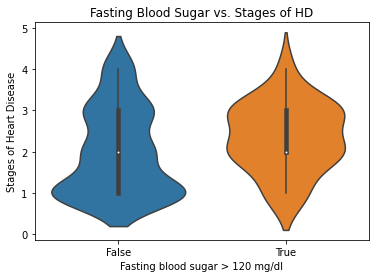

In [ ]:
sns.violinplot(x='fbs', y='num', data=heart_disease)

plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.ylabel('Stages of Heart Disease')
plt.title('Fasting Blood Sugar vs. Stages of HD')

Both favor normal patients whether FBS was true or false, but looking at just affected individuals, the affected individuals have a higher risk of being in stages 2-3 of heart disease than individuals who tested false.

### Making this a binary classification

- Looking to see if normal (0) and individuals with heart disease (1) can reveal better relationships between the features

In [ ]:
df_copy = df.copy()
df_copy['num'] = df_copy['num'].replace([1, 2, 3, 4], 1)
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Text(0.5, 1.0, 'Fasting Blood Sugar vs. Stages of HD')

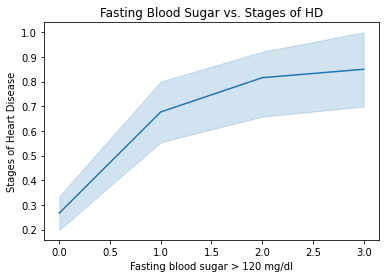

In [ ]:
# @title Lineplot between Fasting Blood Sugar and Heart Disease

sns.lineplot(x='ca', y='num', data=df_copy)

plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.ylabel('Stages of Heart Disease')
plt.title('Fasting Blood Sugar vs. Stages of HD')

Text(0.5, 1.0, 'Fasting Blood Sugar vs. Stages of HD')

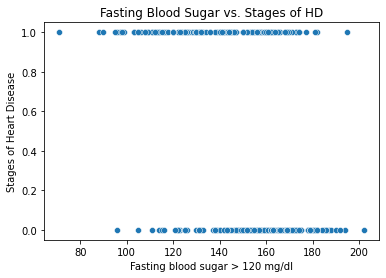

In [ ]:
# @title Scatterplot between Maximum Heart and Heart Disease

sns.scatterplot(x='thalch', y='num', data=df_copy)

plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.ylabel('Stages of Heart Disease')
plt.title('Fasting Blood Sugar vs. Stages of HD')

Suggesting logisitic regression ?

Text(0.5, 1.0, 'Fasting Blood Sugar vs. Stages of HD')

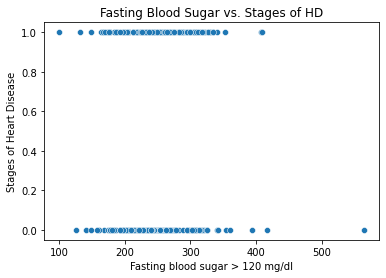

In [ ]:
# @title Scatterplot between Cholestrol and Heart Disease

sns.scatterplot(x='chol', y='num', data=df_copy)

plt.xlabel('Fasting blood sugar > 120 mg/dl')
plt.ylabel('Stages of Heart Disease')
plt.title('Fasting Blood Sugar vs. Stages of HD')

Suggesting logisitic regression ?

Text(0.5, 1.0, 'Thal vs. Stages of HD')

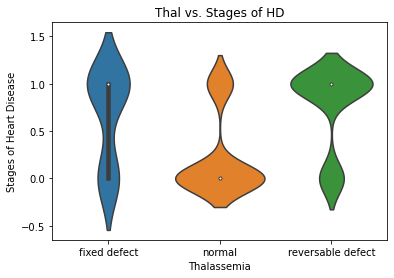

In [ ]:
# @title Violin between Thalassemia and Heart Disease

sns.violinplot(x='thal', y='num', data=df_copy)

plt.xlabel('Thalassemia')
plt.ylabel('Stages of Heart Disease')
plt.title('Thal vs. Stages of HD')

In [ ]:
# @title Data Shuffling
from sklearn.utils import shuffle

df = shuffle(df)

In [ ]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
df[categorical]

,sex,cp,fbs,restecg,exang,slope,thal
142,Male,atypical angina,True,normal,False,upsloping,normal
47,Male,asymptomatic,False,lv hypertrophy,False,flat,reversable defect
234,Female,non-anginal,False,normal,False,upsloping,normal
132,Male,atypical angina,False,lv hypertrophy,False,upsloping,normal
70,Female,non-anginal,False,normal,False,upsloping,normal
...,...,...,...,...,...,...,...
284,Male,asymptomatic,False,normal,False,upsloping,reversable defect
104,Male,non-anginal,False,normal,False,flat,reversable defect
24,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
236,Male,asymptomatic,True,lv hypertrophy,True,downsloping,reversable defect


In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
142,52,Male,atypical angina,128.0,205.0,True,normal,184.0,False,0.0,upsloping,0.0,normal,0
47,50,Male,asymptomatic,150.0,243.0,False,lv hypertrophy,128.0,False,2.6,flat,0.0,reversable defect,4
234,54,Female,non-anginal,160.0,201.0,False,normal,163.0,False,0.0,upsloping,1.0,normal,0
132,29,Male,atypical angina,130.0,204.0,False,lv hypertrophy,202.0,False,0.0,upsloping,0.0,normal,0
70,65,Female,non-anginal,155.0,269.0,False,normal,148.0,False,0.8,upsloping,0.0,normal,0
144,58,Male,non-anginal,105.0,240.0,False,lv hypertrophy,154.0,True,0.6,flat,0.0,reversable defect,0
77,51,Female,non-anginal,140.0,308.0,False,lv hypertrophy,142.0,False,1.5,upsloping,1.0,normal,0
54,60,Male,asymptomatic,130.0,253.0,False,normal,144.0,True,1.4,upsloping,1.0,reversable defect,1
93,44,Female,non-anginal,108.0,141.0,False,normal,175.0,False,0.6,flat,0.0,normal,0
283,35,Male,atypical angina,122.0,192.0,False,normal,174.0,False,0.0,upsloping,0.0,normal,0


In [ ]:
for i in range(len(cols)):
  num_rows = len(df[cols[i]])
  print(f"{cols[i]} number of rows: ", num_rows)

  # use count method to count number of non-null values
  num_non_null = df[cols[i]].count()
  null_values = num_rows - num_non_null
  percent_null = 100 * (null_values / num_rows)

  print(f"{cols[i]} number of non-null rows: ", num_non_null)
  print(f"{cols[i]} number of null rows: ", null_values)
  print(f"{cols[i]} percentage of null rows: ", percent_null)

  print("\n")

age number of rows:  299
age number of non-null rows:  299
age number of null rows:  0
age percentage of null rows:  0.0


sex number of rows:  299
sex number of non-null rows:  299
sex number of null rows:  0
sex percentage of null rows:  0.0


cp number of rows:  299
cp number of non-null rows:  299
cp number of null rows:  0
cp percentage of null rows:  0.0


trestbps number of rows:  299
trestbps number of non-null rows:  299
trestbps number of null rows:  0
trestbps percentage of null rows:  0.0


chol number of rows:  299
chol number of non-null rows:  299
chol number of null rows:  0
chol percentage of null rows:  0.0


fbs number of rows:  299
fbs number of non-null rows:  299
fbs number of null rows:  0
fbs percentage of null rows:  0.0


restecg number of rows:  299
restecg number of non-null rows:  299
restecg number of null rows:  0
restecg percentage of null rows:  0.0


thalch number of rows:  299
thalch number of non-null rows:  299
thalch number of null rows:  0
thalch 

In [ ]:
df['num']

142    0
47     4
234    0
132    0
70     0
      ..
284    2
104    3
24     4
236    2
108    2
Name: num, Length: 299, dtype: int64

In [ ]:
df_copy['num']

0      0
1      1
2      1
3      0
4      0
      ..
299    1
300    1
301    1
508    1
748    1
Name: num, Length: 299, dtype: int64

## Model Creation

In [ ]:
test_df = df[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()

test_df['target'] = ((df['num'] > 0)*1).copy()

test_df.head()

,age,sex,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,target
142,52,Male,atypical angina,128.0,205.0,True,184.0,False,0.0,upsloping,0.0,normal,0
47,50,Male,asymptomatic,150.0,243.0,False,128.0,False,2.6,flat,0.0,reversable defect,1
234,54,Female,non-anginal,160.0,201.0,False,163.0,False,0.0,upsloping,1.0,normal,0
132,29,Male,atypical angina,130.0,204.0,False,202.0,False,0.0,upsloping,0.0,normal,0
70,65,Female,non-anginal,155.0,269.0,False,148.0,False,0.8,upsloping,0.0,normal,0


In [ ]:
testing = pd.get_dummies(test_df, drop_first=False)
testing.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
       'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
y = testing['target']
X = testing.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [ ]:
print(f"The size of the training set for X: {X_train.shape}")
print(f"The size of the testing set for X: {X_test.shape}")
print(f"The size of the total set for X: {len(X)}")


The size of the training set for X: (239, 22)
The size of the testing set for X: (60, 22)
The size of the total set for X: 299


In [ ]:
print(f"The size of the training set for y: {y_train.shape}")
print(f"The size of the testing set for y: {y_test.shape}")
print(f"The size of the total set for y: {len(y)}")

The size of the training set for y: (239,)
The size of the testing set for y: (60,)
The size of the total set for y: 299


In [ ]:
# @title Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# @title Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)
gauss_score = gauss_model.score(X_test, y_test)


In [ ]:
# @title Decision Tree Classifier
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_score = tree_model.score(X_test, y_test)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = logre.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred)

models_used = [log_accuracy, gauss_score, tree_score]
models = ["Logisitic Regression", "Naive Bayes", "Decision Tree"]

for n in range(len(models_used)):
  print(f"Accuracy for {models[n]} Classifier: {models_used[n]}")

Accuracy for Logisitic Regression Classifier: 0.8666666666666667
Accuracy for Naive Bayes Classifier: 0.85
Accuracy for Decision Tree Classifier: 0.7


# Binary Classification for Heart Disease

In [ ]:
bin_df = df_copy[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
bin_df['target'] = df_copy['num']
bin_df.head()

,age,sex,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# @title Encoding (Categorical to Numerical)
binary = pd.get_dummies(test_df, drop_first=False)
binary.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
       'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
y = binary['target']
X = binary.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# @title Normalization of Data
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [ ]:
print(f"The size of the training set for X: {X_train.shape}")
print(f"The size of the testing set for X: {X_test.shape}")
print(f"The size of the total set for X: {len(X)}")


The size of the training set for X: (239, 22)
The size of the testing set for X: (60, 22)
The size of the total set for X: 299


In [ ]:
print(f"The size of the training set for y: {y_train.shape}")
print(f"The size of the testing set for y: {y_test.shape}")
print(f"The size of the total set for y: {len(y)}")

The size of the training set for y: (239,)
The size of the testing set for y: (60,)
The size of the total set for y: 299


In [ ]:
# @title Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)
logre_score = logre.score(X_test, y_test)

In [ ]:
# @title Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)
gauss_score = gauss_model.score(X_test, y_test)


In [ ]:
# @title Decision Tree Classifier
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_score = tree_model.score(X_test, y_test)


In [ ]:
bin_models = [logre_score, gauss_score, tree_score]
bin = ["Logisitic Regression: ", "Naive Bayes: ", "Decision Tree: "]

for i in range(len(bin_models)):
  print(bin[i], bin_models[i])

Logisitic Regression:  0.8666666666666667
Naive Bayes:  0.8833333333333333
Decision Tree:  0.6333333333333333


# Risk Assessment Proof of Concept

In [ ]:
binary.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target',
       'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
       'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [ ]:
binary.head()

,age,trestbps,chol,thalch,oldpeak,ca,target,sex_Female,sex_Male,cp_asymptomatic,...,fbs_False,fbs_True,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
142,52,128.0,205.0,184.0,0.0,0.0,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
47,50,150.0,243.0,128.0,2.6,0.0,1,0,1,1,...,1,0,1,0,0,1,0,0,0,1
234,54,160.0,201.0,163.0,0.0,1.0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
132,29,130.0,204.0,202.0,0.0,0.0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
70,65,155.0,269.0,148.0,0.8,0.0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [ ]:
print("Welcome to the Heart Assessment Test!")
print("Please answer the following questions to move forward")

age = input("Please enter your age: ")
sex = input("Please enter your sex: ")
chest_pain = input("Please enter your chest pain type: ")
trestbps = input("Please enter your resting blood pressure : ")
cholestrol = input("Please enter your cholesterol (mg/dl): ")
fasting_blood_sugar = input("Please enter True or False if your fasting blood sugar is greater than 120 mg/dl: ")
resting_ecg = input("Please enter resting ecg: ")
thalch = input("Please enter maximum heart rate: ")
exang = input("Please enter True or False for exercise-induced angina: ")
oldpeak = input("Please enter ST depression induced by exercise relative to rest: ")
slopes = input("Please enter slope: ")
vessels = input("Please enter number of major vessels: ")
thal = input("Please enter thal: ")

gauss_model.predict([[int(age), sex, chest_pain, float(trestbps), float(cholestrol), bool(fasting_blood_sugar), resting_ecg, float(thalch), bool(exang), float(oldpeak), slopes, float(vessels), thal]])

Welcome to the Heart Assessment Test!
Please answer the following questions to move forward


Note for later:

- Make sure to remove one of the dummy columns for each categorical feature to prevent the dummy trap variable
- Retry the inputs method after doing the above for proper model prediciton